In [19]:
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/p9/gsg6n22x4bn6jplw95gz1fmh0000gn/T/pip-req-build-l0f0nlwp
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/p9/gsg6n22x4bn6jplw95gz1fmh0000gn/T/pip-req-build-l0f0nlwp
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0f06c3f4c86d79e0fe1391e3f0aa81779bbd509f
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit
from qiskit.providers.fake_provider import *

In [21]:
from qiskit_textbook.widgets import scalable_circuit

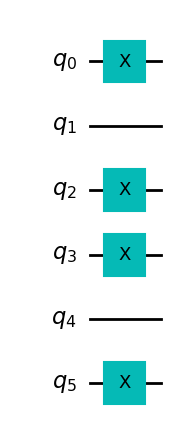

In [22]:
nqubits = 6
qc = QuantumCircuit(nqubits)
qc.x(0)
qc.x(2)
qc.x(3)
qc.x(5)
qc.draw("mpl")

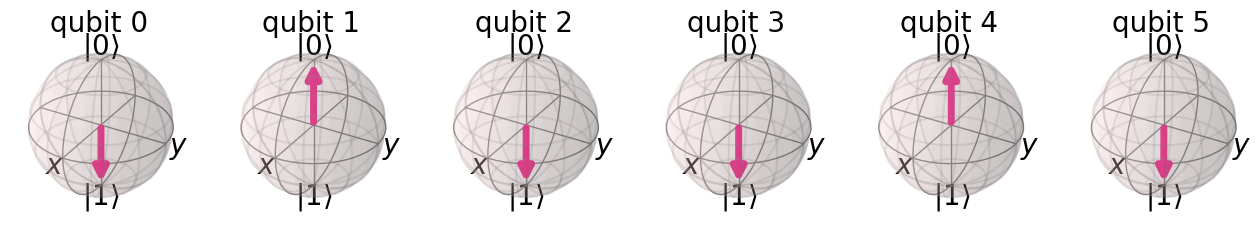

In [23]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [24]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [25]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [26]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

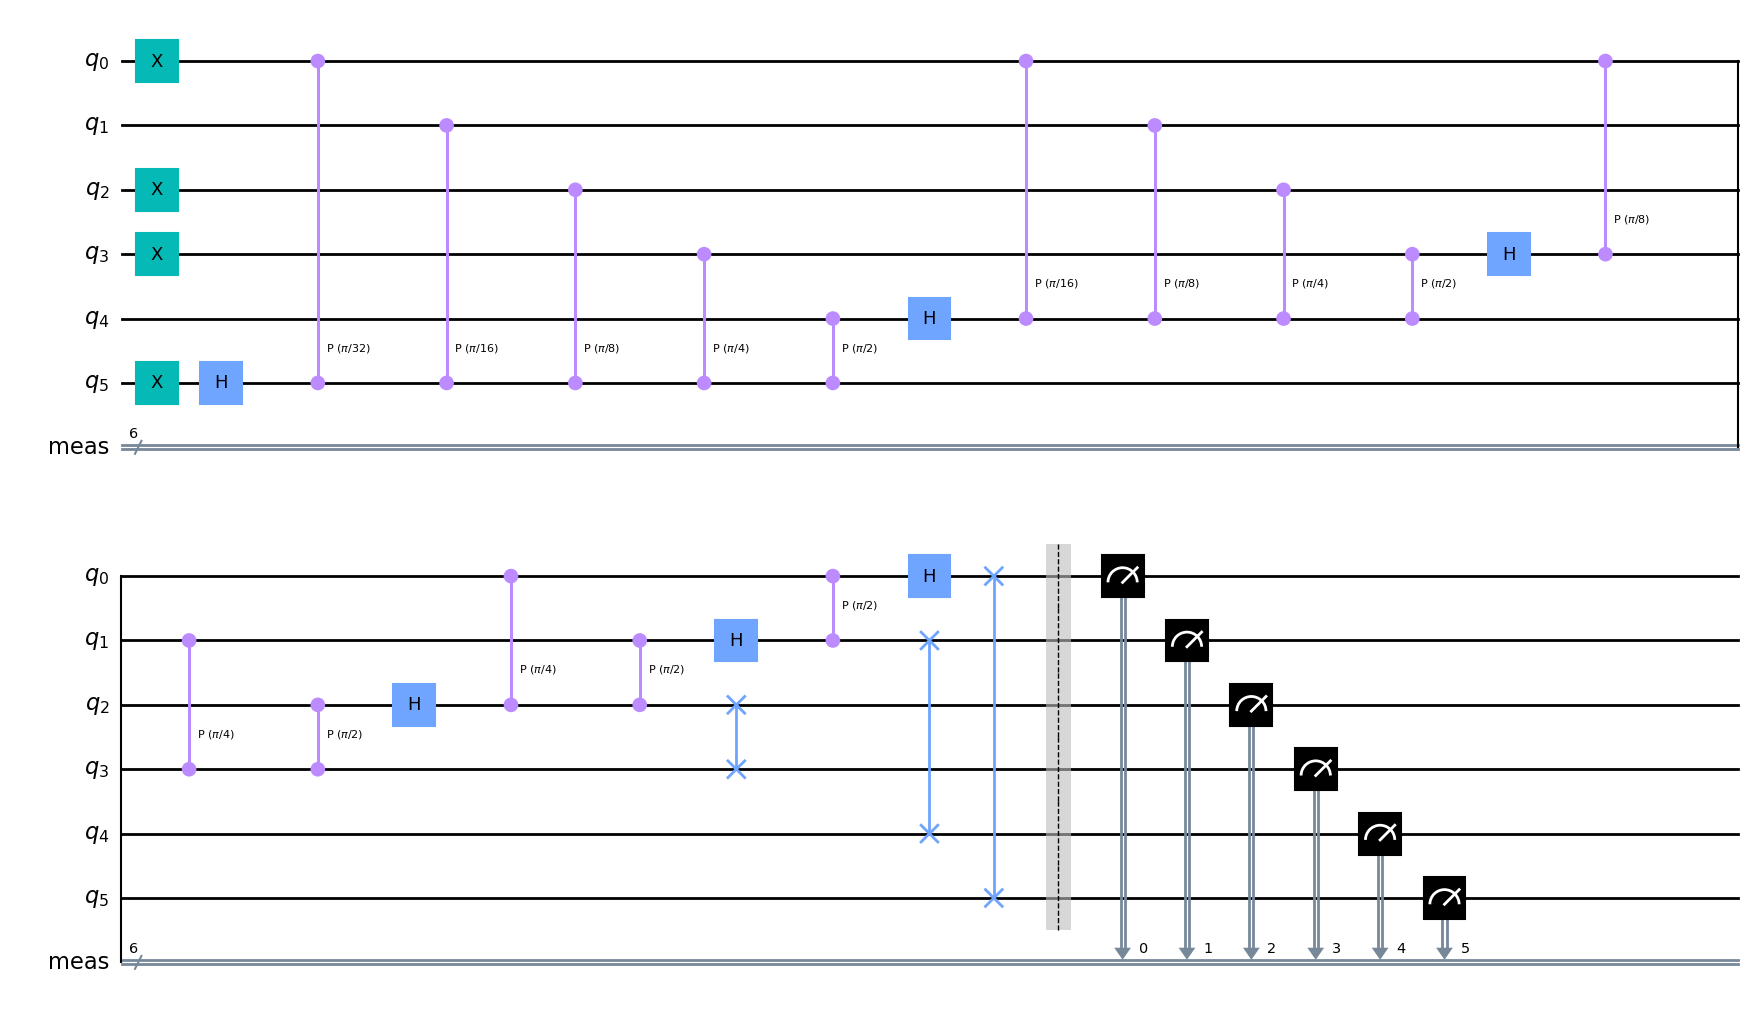

In [27]:
qc_qft = QuantumCircuit(nqubits)
qc_qft = qft(qc,nqubits)
qc_qft.measure_all()
qc_qft.draw("mpl")

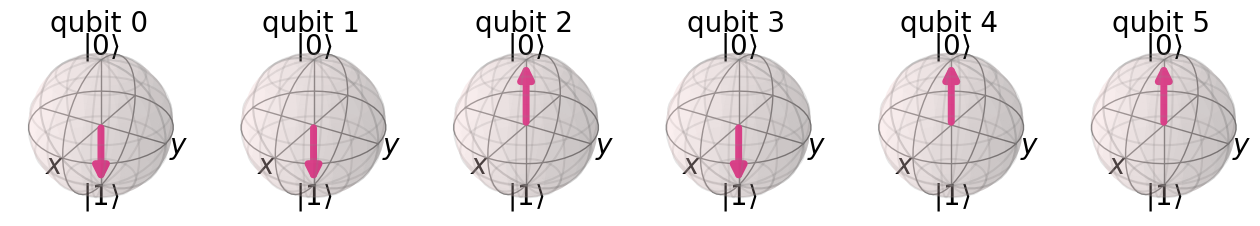

In [28]:
sim = Aer.get_backend("aer_simulator")
qc_init_qft = qc_qft.copy()
qc_init_qft.save_statevector()
statevector = sim.run(qc_init_qft).result().get_statevector()
plot_bloch_multivector(statevector)

In [29]:
backend = FakeMontreal()

In [30]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc_qft, shots=shots)
job_monitor(job)

Job Status: job has successfully run


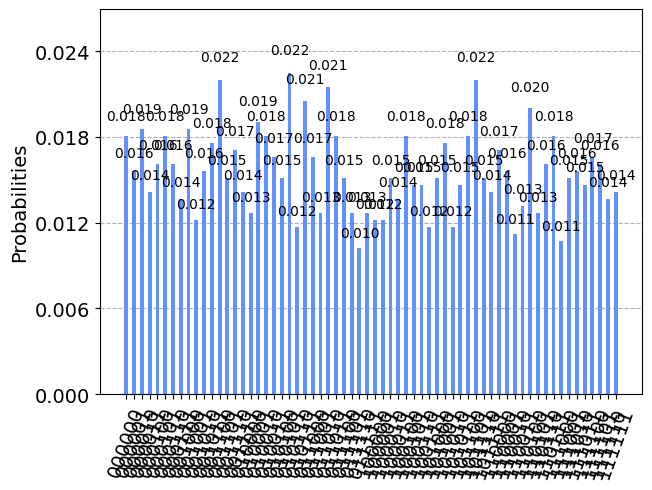

In [31]:
counts = job.result().get_counts()
plot_histogram(counts)

In [32]:
counts

{'111000': 22,
 '000010': 38,
 '001110': 35,
 '010101': 46,
 '011110': 21,
 '111011': 30,
 '100001': 25,
 '111001': 31,
 '000110': 33,
 '111111': 29,
 '110110': 33,
 '110000': 35,
 '010000': 26,
 '100110': 30,
 '101101': 45,
 '110011': 27,
 '110001': 32,
 '011101': 26,
 '000101': 37,
 '000000': 37,
 '000100': 33,
 '001010': 32,
 '001100': 45,
 '101000': 31,
 '100100': 37,
 '010011': 34,
 '100010': 31,
 '101100': 37,
 '100111': 24,
 '001111': 29,
 '110101': 26,
 '011111': 26,
 '101010': 24,
 '111110': 28,
 '100000': 25,
 '100011': 28,
 '111100': 34,
 '001000': 38,
 '111010': 32,
 '010111': 42,
 '010001': 39,
 '010110': 24,
 '111101': 33,
 '110111': 37,
 '011001': 26,
 '010100': 31,
 '000111': 28,
 '101110': 31,
 '110100': 41,
 '000011': 29,
 '101001': 36,
 '110010': 23,
 '101011': 30,
 '011100': 31,
 '101111': 29,
 '001101': 31,
 '000001': 32,
 '100101': 30,
 '001001': 25,
 '001011': 36,
 '011011': 37,
 '011000': 34,
 '010010': 37,
 '011010': 44}

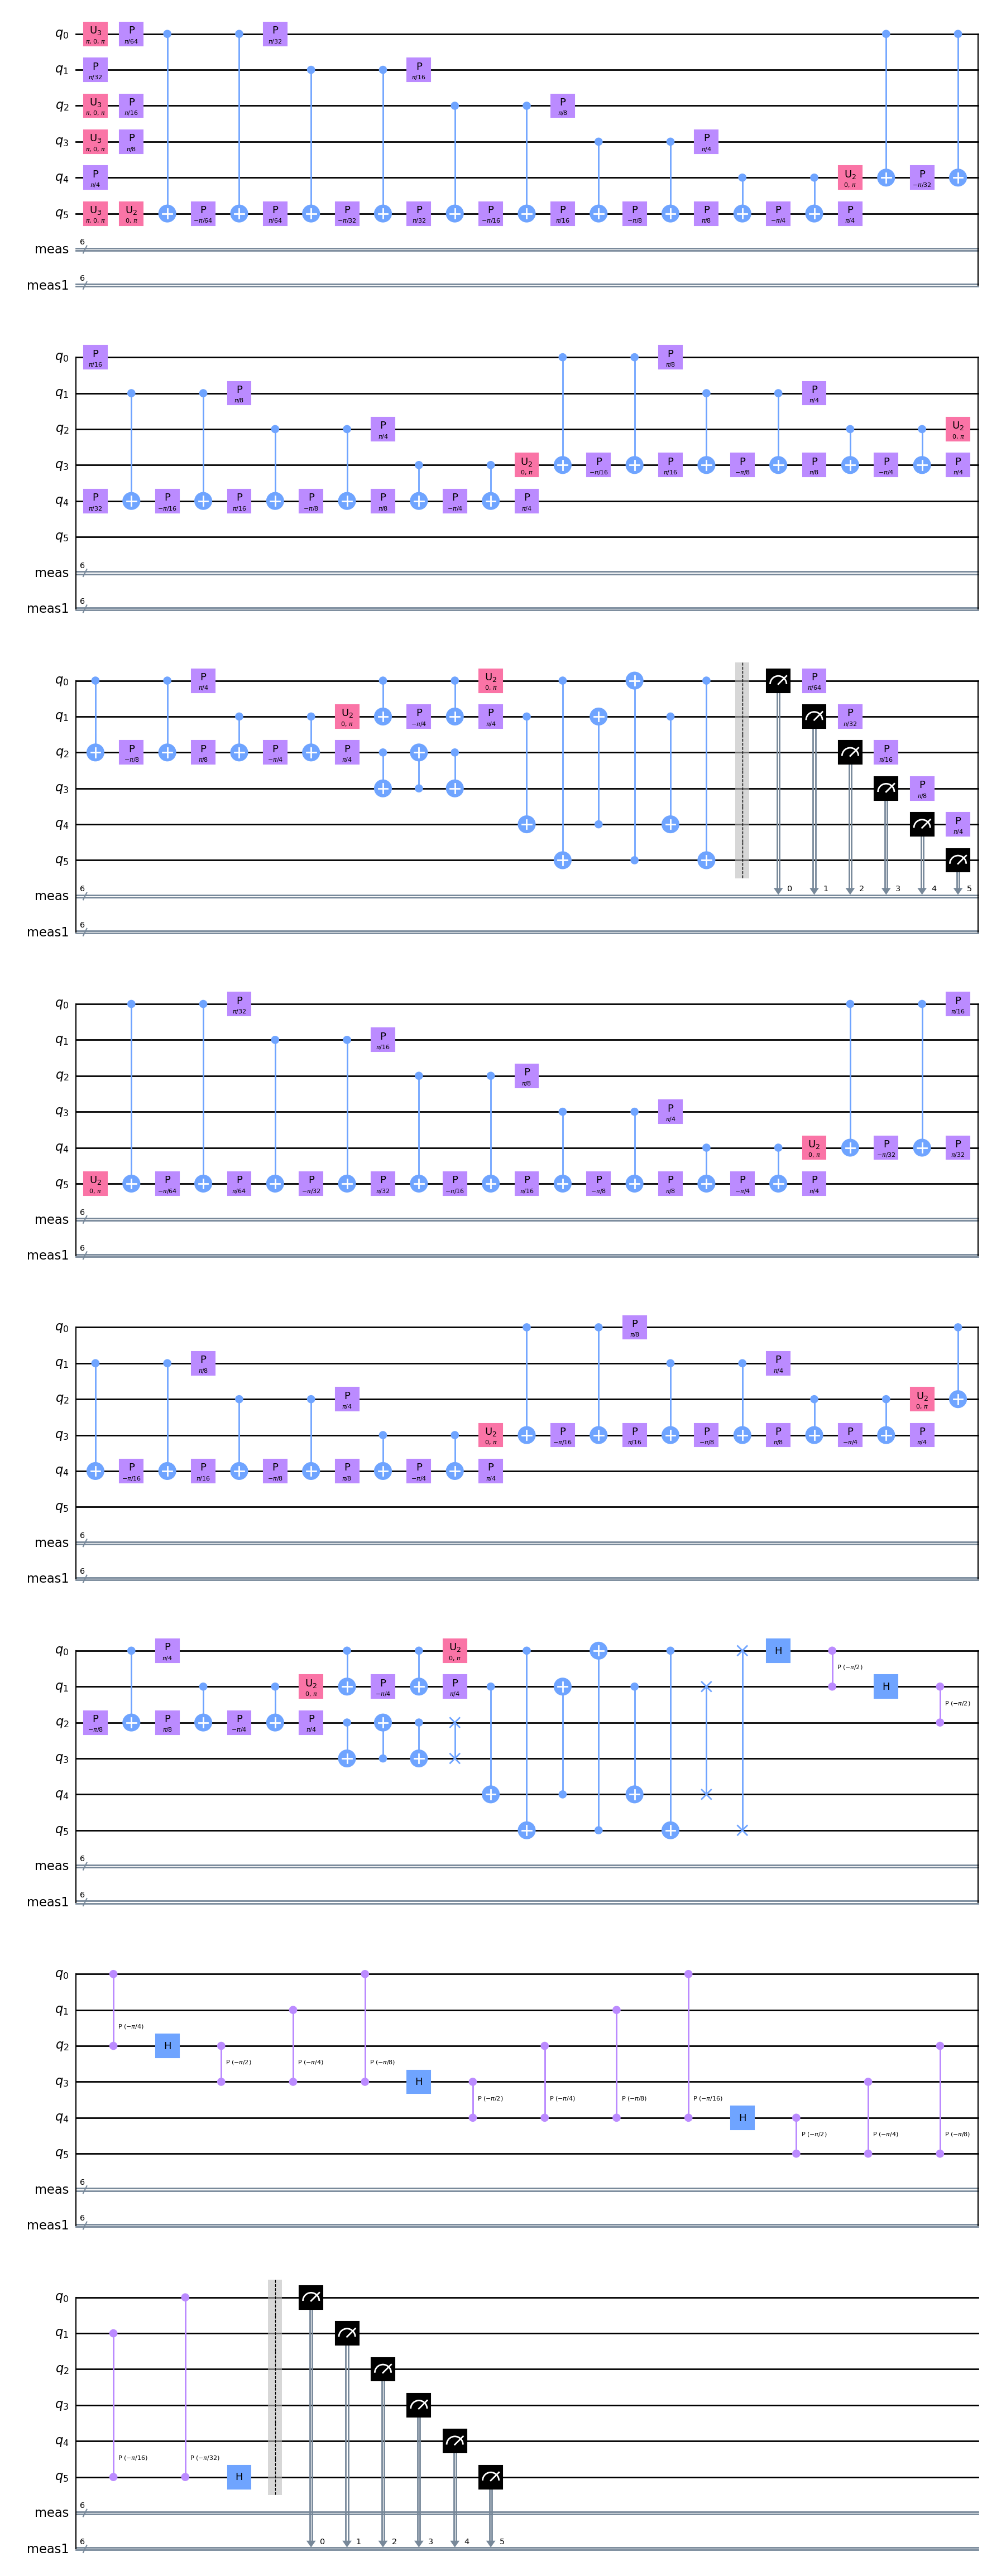

In [33]:
qc_qft = QuantumCircuit(nqubits)
qc_iqft = QuantumCircuit(nqubits)
qc_qft = qft(qc,nqubits)
qc_iqft = inverse_qft(qc_qft, nqubits)
qc_iqft.measure_all()
qc_iqft.draw("mpl")

In [34]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc_iqft, shots=shots)
job_monitor(job)

Job Status: job has successfully run


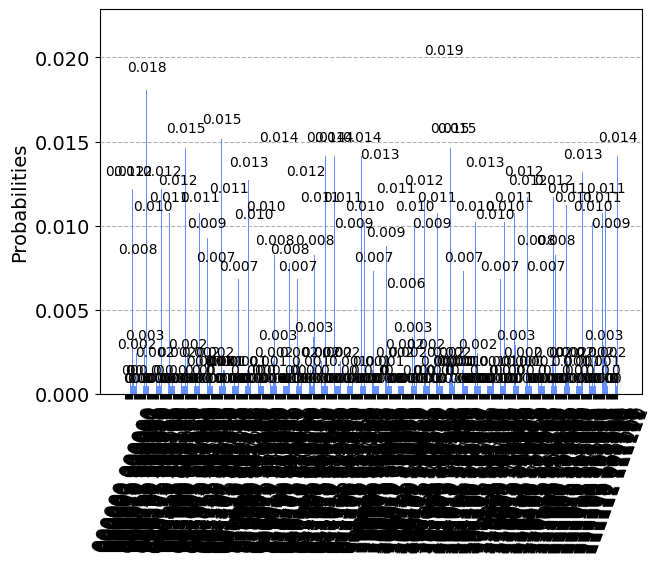

In [35]:
counts = job.result().get_counts()
plot_histogram(counts)

In [36]:
counts

{'010010 000010': 1,
 '011011 110111': 1,
 '111100 110100': 1,
 '001000 001001': 1,
 '011111 111111': 1,
 '110000 110100': 1,
 '100011 011011': 1,
 '111001 011011': 1,
 '101110 000100': 1,
 '100000 100010': 1,
 '001110 011110': 1,
 '011110 011100': 1,
 '101011 001111': 1,
 '100100 101110': 1,
 '100100 100000': 1,
 '010001 011001': 1,
 '101011 101101': 1,
 '001001 000101': 1,
 '010000 111110': 1,
 '101000 100110': 1,
 '000011 001011': 1,
 '001000 101010': 1,
 '000011 000010': 1,
 '110100 001000': 1,
 '001100 111110': 1,
 '101101 101100': 1,
 '011010 010010': 1,
 '010011 100011': 1,
 '100001 100101': 1,
 '000010 001010': 2,
 '110010 001010': 1,
 '010110 000110': 1,
 '010001 110011': 1,
 '110111 010101': 1,
 '011101 011011': 1,
 '000101 010101': 1,
 '101100 111110': 1,
 '110001 100001': 2,
 '110000 000110': 1,
 '011100 011110': 1,
 '111010 100110': 1,
 '001010 001110': 2,
 '001101 010100': 1,
 '001000 110110': 1,
 '100000 110000': 2,
 '010000 010100': 1,
 '011101 011111': 1,
 '111111 1111